In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
employees = pd.read_csv('employees.csv', sep=';')
communications = pd.read_csv('communications.csv', sep=';')
course_employee_sms = pd.read_csv('course_employee_sms.csv', sep=';')
courses_info = pd.read_csv('courses_info.csv', sep=';')
courses_passing = pd.read_csv('courses_passing.csv', sep=';')

---

# 1. Сотрудники

In [3]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   employee_id       2381 non-null   object
 1   sex               2381 non-null   object
 2   region            2381 non-null   int64 
 3   age               2381 non-null   int64 
 4   head_employee_id  2381 non-null   object
 5   exp_days          2381 non-null   int64 
 6   edu_degree        2381 non-null   int64 
 7   department_id     2381 non-null   int64 
 8   work_online_flg   2381 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 167.5+ KB


In [4]:
# Проверяем датасет на пропущенные значения

employees.isnull().sum()

employee_id         0
sex                 0
region              0
age                 0
head_employee_id    0
exp_days            0
edu_degree          0
department_id       0
work_online_flg     0
dtype: int64

Пропущенные значения отсутствуют.

In [5]:
# Преобразуем поля пол и образование в текстовый формат для наглядности в визуализациях

def sex_trasform(element:str) -> str:
    """ Функция для преобразования пола в полное текстовое значение

    Args:
        element (str): элемент массива

    Returns:
        str: преобразованный элемент массива
    """
    if element == 'M':
        element = 'Мужской'
    elif element == 'F':
        element = 'Женский'
    return element

def edu_degree_transform(element:str) -> str:
    """ Функция для преобразования уровня образования в полное текстовое значение

    Args:
        element (str): элемент массива

    Returns:
        str: преобразованный элемент массива
    """
    if element == 0:
        element = 'Неоконченное среднее'
    elif element == 1:
        element = 'Среднее'
    else:
        element = 'Высшее'
    return element

employees['sex_transform'] = employees['sex'].apply(sex_trasform)
employees['edu_degree_transform'] = employees['edu_degree'].apply(edu_degree_transform)

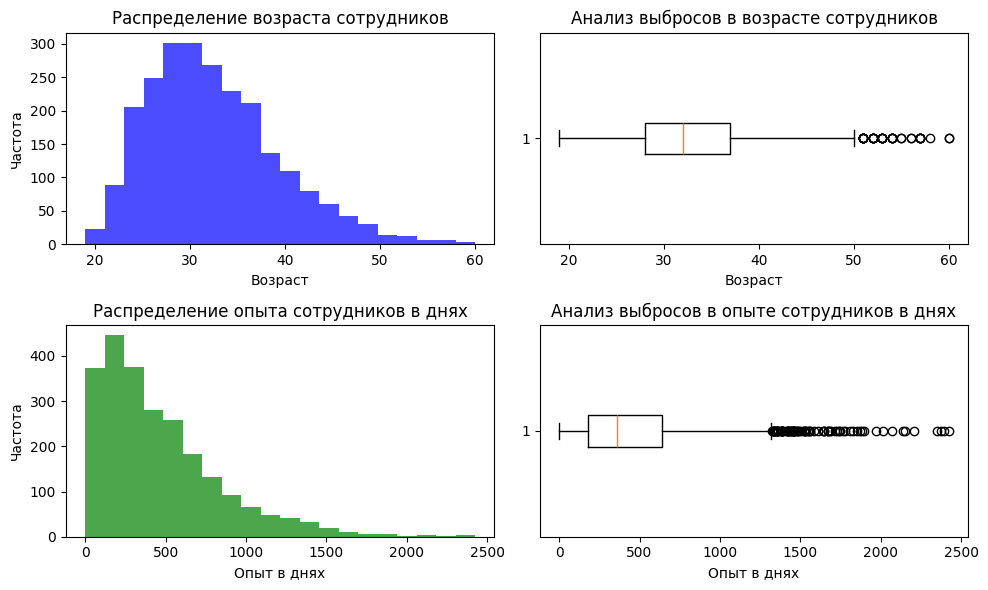

In [6]:
# Строим визуализуацию основных статистических показателей для возраста и опыта работы в днях

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(employees['age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста сотрудников')

plt.subplot(2, 2, 2)
plt.boxplot(employees['age'], vert=False)
plt.xlabel('Возраст')
plt.title('Анализ выбросов в возрасте сотрудников')

plt.subplot(2, 2, 3)
plt.hist(employees['exp_days'], bins=20, color='green', alpha=0.7)
plt.xlabel('Опыт в днях')
plt.ylabel('Частота')
plt.title('Распределение опыта сотрудников в днях')

plt.subplot(2, 2, 4)
plt.boxplot(employees['exp_days'], vert=False)
plt.xlabel('Опыт в днях')
plt.title('Анализ выбросов в опыте сотрудников в днях')

plt.tight_layout()
plt.show()

## Выводы
### Возраст
1. Медианное значение возрастов сотрудников колеблется возле 33-34 лет.
2. 75% сотрудников колл-центра в возрасте до 40 лет.
3. Встречаются старшие сотрудники от 50 лет: замечено 9 случаев.
4. В компании есть также младшые сотрудники от 18 лет (минимальная граница).

### Опыт работы
1. В среднем сотрудники имеют опыт работы от 400 до 500 дней. 75% сотрудников имеют опыт работы до 700 дней.
2. Встречаются случаи работников с большим опытом работы в компании: от 2000 дней и более.


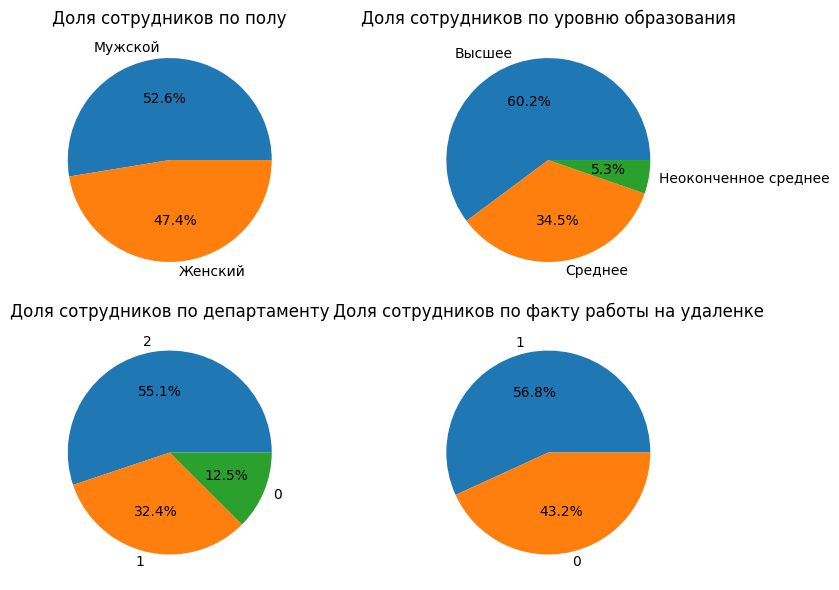

In [7]:
# Строим визуализуацию распределения сотрудников по признакам

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.pie(x=employees['sex_transform'].value_counts().values, labels=employees['sex_transform'].value_counts().index, autopct='%1.1f%%')
plt.title('Доля сотрудников по полу')

plt.subplot(2, 2, 2)
plt.pie(x=employees['edu_degree_transform'].value_counts().values, labels=employees['edu_degree_transform'].value_counts().index, autopct='%1.1f%%')
plt.title('Доля сотрудников по уровню образования')

plt.subplot(2, 2, 3)
plt.pie(x=employees['department_id'].value_counts().values, labels=employees['department_id'].value_counts().index, autopct='%1.1f%%')
plt.title('Доля сотрудников по департаменту')

plt.subplot(2, 2, 4)
plt.pie(x=employees['work_online_flg'].value_counts().values, labels=employees['work_online_flg'].value_counts().index, autopct='%1.1f%%')
plt.title('Доля сотрудников по факту работы на удаленке')

plt.tight_layout()
plt.show()

## Выводы

1. В колл-центре преобладает доля мужского пола - 52.6 %.
2. Подавляющее большинство сотрудников закончили ВУЗ и имеют высшее образование (60.2 %), 34.5 % имеют среднее образование.
3. Наибольшее количество сотрудников сосредоточено во 2 и 1 департаменте.
4. 56.8% сотрудников работают на удаленном режиме.

---
# 2. Коммуникации

In [8]:
communications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345246 entries, 0 to 5345245
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   communication_id     int64 
 1   communication_dt     object
 2   employee_id          object
 3   communication_score  int64 
 4   util_flg             int64 
dtypes: int64(3), object(2)
memory usage: 203.9+ MB


In [9]:
# Проверяем датасет на пропущенные значения

communications.isnull().sum()

communication_id       0
communication_dt       0
employee_id            0
communication_score    0
util_flg               0
dtype: int64

Пропущенные значения отсутствуют

In [10]:
communications.head(5)

,communication_id,communication_dt,employee_id,communication_score,util_flg
0,177074281189583840,2023-02-07 00:00:00,269d837a-fada-308d-d4ae-ab28ca2d57e4,85,0
1,189925315406757324,2023-07-29 00:00:00,e6384711-4917-13d2-9bc6-3fc5eeb5ba4f,100,0
2,321818238739717242,2023-09-06 00:00:00,ab541d87-4c7b-c19a-b776-42849e02b89f,43,1
3,192259329962028989,2023-06-19 00:00:00,0a0a0c8a-aa00-ade5-0f74-a3f0ca981ed7,100,1
4,705274671052151857,2023-08-11 00:00:00,f93882cb-d8fc-7fb7-94c1-011d63be6fb6,46,0


In [11]:
# Приводим дату к нужному формату, также для месячной статистии округляем период до месяца

communications['communication_dt'] = pd.to_datetime(communications['communication_dt'], dayfirst=False)

communications['month_dt'] = communications['communication_dt'] - pd.offsets.MonthBegin(1)

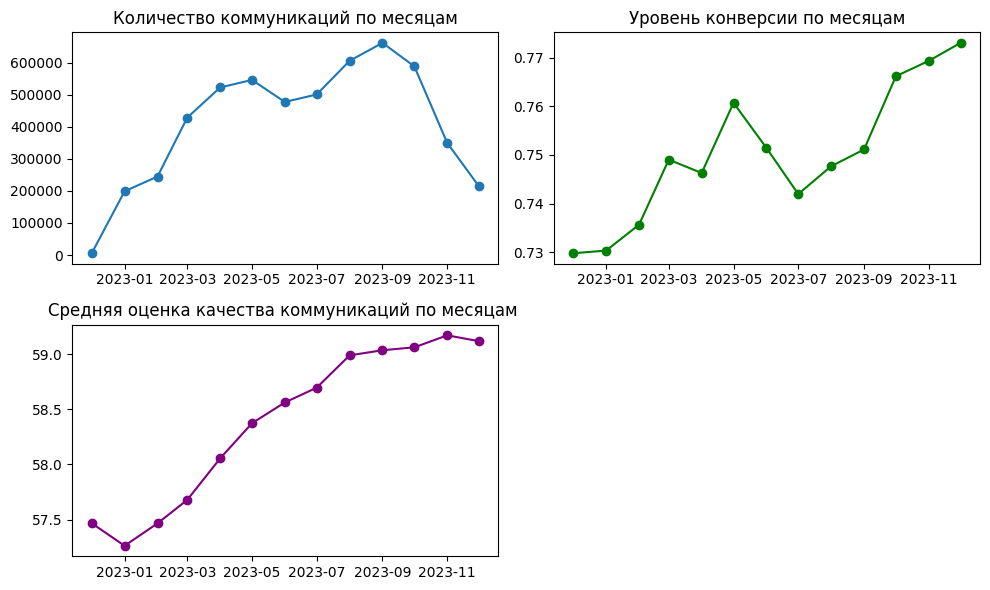

In [12]:
# Строим визуализуацию для статистических показателей коммуникаций

plt.figure(figsize=(10, 6))

# Количество коммуникаций по месяцам

cnt_communic_month = communications.groupby(communications['month_dt'])['communication_id'].count()

plt.subplot(2, 2, 1)
plt.plot(cnt_communic_month.index, cnt_communic_month.values, marker="o")
plt.title('Количество коммуникаций по месяцам')

# Уровень конверсии по месяцам (доля воспользовавшихся продуктом после звонка)

conversion_rate_month = communications.groupby(communications['month_dt'])['util_flg'].sum()
conversion_rate_month = pd.merge(conversion_rate_month, cnt_communic_month, on='month_dt')
conversion_rate_month['conversion_rate'] = conversion_rate_month['util_flg'] / conversion_rate_month['communication_id']

plt.subplot(2, 2, 2)
plt.plot(conversion_rate_month['conversion_rate'].index, conversion_rate_month['conversion_rate'].values, marker="o", color='green')
plt.title('Уровень конверсии по месяцам')

# Средняя оценка качества коммуникаций по месяцам 

avg_communication_score_month = communications.groupby(communications['month_dt'])['communication_score'].mean()

plt.subplot(2, 2, 3)
plt.plot(avg_communication_score_month.index, avg_communication_score_month.values, marker="o", color='purple')
plt.title('Средняя оценка качества коммуникаций по месяцам ')

plt.tight_layout()
plt.show()

## Выводы

1. Наибольшее количество коммуникаций было совершено в сентябре 2023 года.
2. С начала 2023 года наблюдается рост потенциала в количестве коммуникаций с клиентами (возможно приток сотрудников).
3. Наилучшая конверсия в лид наблюдается в конце 2023 года, также заметный прирост можно увидеть в мае 2023 года.
4. Можно заметить, что с января 2023 года наблюдается непрерывный рост средней оценки коммуникации сотрудников до ноября 2023 года.

---

# 3. Пройденные курсы

In [13]:
courses_passing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   course_id           10950 non-null  int64  
 1   employee_id         10950 non-null  object 
 2   pass_frac           10950 non-null  float64
 3   start_dt            10950 non-null  object 
 4   last_activity_dt    10950 non-null  object 
 5   end_dt              8404 non-null   object 
 6   educ_duration_days  8404 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 599.0+ KB


In [14]:
courses_passing.head(5)

,course_id,employee_id,pass_frac,start_dt,last_activity_dt,end_dt,educ_duration_days
0,24,53ed35c7-4a2e-c275-b837-374f04396c03,1.0,2023-01-30 00:00:00,2023-02-05 00:00:00,2023-02-05 00:00:00,6.0
1,83,202cb962-ac59-075b-964b-07152d234b70,1.0,2023-08-29 00:00:00,2023-09-10 00:00:00,2023-09-10 00:00:00,12.0
2,4,05f971b5-ec19-6b8c-65b7-5d2ef8267331,1.0,2023-07-29 00:00:00,2023-08-09 00:00:00,2023-08-09 00:00:00,11.0
3,79,f4a331b7-a22d-1b23-7565-d8813a34d8ac,1.0,2023-05-30 00:00:00,2023-06-09 00:00:00,2023-06-09 00:00:00,10.0
4,6,aba3b6fd-5d18-6d28-e06f-f97135cade7f,1.0,2023-07-12 00:00:00,2023-07-22 00:00:00,2023-07-22 00:00:00,10.0


In [15]:
# Проверяем пропущенные значения

courses_passing.isnull().sum()

course_id                0
employee_id              0
pass_frac                0
start_dt                 0
last_activity_dt         0
end_dt                2546
educ_duration_days    2546
dtype: int64

Пропущенные значения только для полей, в которых они приемлимы.

In [16]:
# Приводим даты к нужному формату 

courses_passing['start_dt'] = pd.to_datetime(courses_passing['start_dt'], dayfirst=False)
courses_passing['last_activity_dt'] = pd.to_datetime(courses_passing['last_activity_dt'], dayfirst=False)
courses_passing['end_dt'] = pd.to_datetime(courses_passing['end_dt'], dayfirst=False)

In [17]:
# Повторное возвращение сотрудников к курсам

courses_passing[courses_passing['last_activity_dt'] > courses_passing['end_dt']]

,course_id,employee_id,pass_frac,start_dt,last_activity_dt,end_dt,educ_duration_days


Можно заметить, что сотрудники не возвращаются к курсам после их прохождения.

In [18]:
# Рассчитаем основные статистические показатели по прохождению курсов

employee_course_stats = pd.DataFrame()

sum_days_study = courses_passing.groupby(courses_passing['employee_id'])['educ_duration_days'].sum() # всего дней на обучение
cnt_courses_per_employee = courses_passing.groupby(courses_passing['employee_id'])['course_id'].count() # количество затронутых курсов
cnt_compl_courses_per_employee = courses_passing.groupby(courses_passing[courses_passing['pass_frac'] == 1]['employee_id'])['course_id'].count() # количество завершенных курсов

employee_course_stats['employee_id'] = sum_days_study.index # ID сотрудника
employee_course_stats['sum_days'] = sum_days_study.values # количество дней на обучение
employee_course_stats['cnt_courses'] = cnt_courses_per_employee.values # количество затронутых курсов
employee_course_stats['cnt_completed_courses'] = pd.merge(employee_course_stats, cnt_compl_courses_per_employee, on='employee_id', how='left')['course_id'] # количество завершенных курсов
employee_course_stats['avg_days_course'] = round(employee_course_stats['sum_days'] / employee_course_stats['cnt_courses'], 2) # среднее количество дней на один курс
employee_course_stats['percent_completed_course'] = round(employee_course_stats['cnt_completed_courses'] / employee_course_stats['cnt_courses'], 2) # доля завершенных курсов

employee_course_stats.count()

employee_id                 1758
sum_days                    1758
cnt_courses                 1758
cnt_completed_courses       1684
avg_days_course             1758
percent_completed_course    1684
dtype: int64

Можно заметить что не все сотрудники проходят обучающие курсы: из 2381 сотрудников к прохождению курсов преступили 1758, что составляет примерно 73 %.


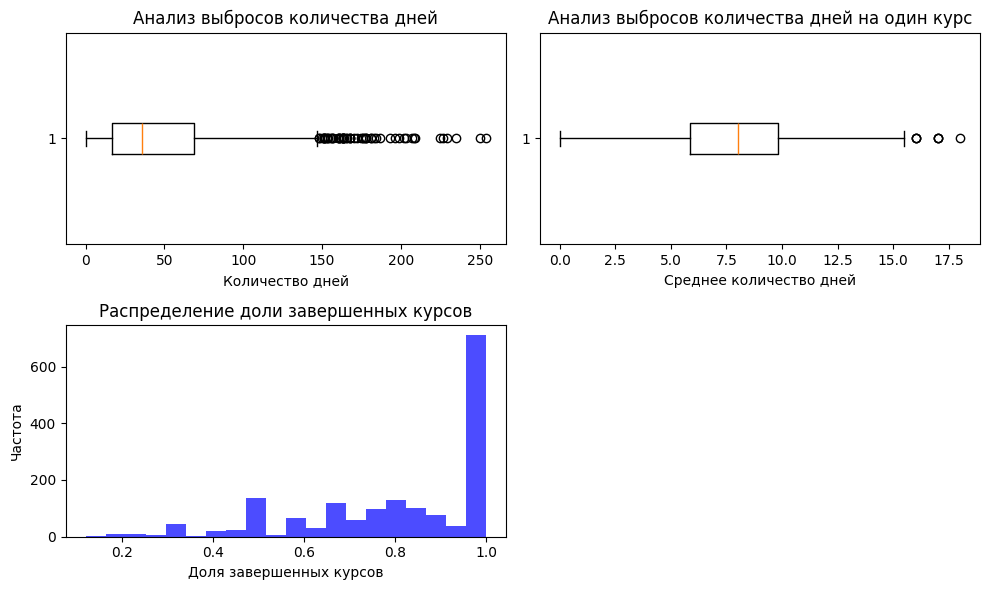

In [19]:
# Строим визуализуацию для статистических показателей прохождения курсов

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.boxplot(employee_course_stats['sum_days'], vert=False)
plt.xlabel('Количество дней')
plt.title('Анализ выбросов количества дней')

plt.subplot(2, 2, 2)
plt.boxplot(employee_course_stats['avg_days_course'], vert=False)
plt.xlabel('Среднее количество дней')
plt.title('Анализ выбросов количества дней на один курс')

plt.subplot(2, 2, 3)
plt.hist(employee_course_stats['percent_completed_course'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Доля завершенных курсов')
plt.ylabel('Частота')
plt.title('Распределение доли завершенных курсов')

plt.tight_layout()
plt.show()

## Выводы

1. В среднем сотрудники тратят суммарно 45-50 дней на обучение. Однако, встречаются сотрудники затрачивающие свыше 200 дней.
2. В среднем на прохождение курса сотрудники тратят 7-8 дней (1 неделя), 75% процентов сотрудникам необходимо до 10 дней для полного завершения курса.
3. Подавляющее большинство сотрудников завершают курс на от 80 до 100%.

In [20]:
# Количество сотрудников, не завершивших ни один начатый курс

employee_course_stats['percent_completed_course'].isnull().sum()

74

Можно заметить, что присутсвуют сотрудники, которые не завершили ни один курс - их число составляет 74 штуки.

--- 

# 4. Суммарный свод показателей

In [21]:
# Соберем финальный датасет, чтобы понять по тепловой карте, какие признаки могут оказывать влияние на качество коммуникации и сумму проданных продуктов

employees_new = employees[['employee_id', 'region',	'age', 'exp_days', 'edu_degree','department_id', 'work_online_flg']]

# Пройденные курсы
employees_new = pd.merge(employees_new, employee_course_stats, on='employee_id', how='left')


# Коммуникации
cnt_communications = communications.groupby(communications['employee_id'])['communication_id'].count()
avg_communic_score = communications.groupby(communications['employee_id'])['communication_score'].mean()
sum_deal = communications.groupby(communications['employee_id'])['util_flg'].sum()
communications_new = pd.DataFrame(cnt_communications)
communications_new['avg_communication_score'] = pd.merge(communications_new, avg_communic_score, on='employee_id')['communication_score']
communications_new['sum_deal_product'] = pd.merge(communications_new, sum_deal, on='employee_id')['util_flg']


employees_new = pd.merge(employees_new, communications_new, on='employee_id', how='left')

In [22]:
employees_new_d = employees_new.drop(['employee_id'], axis=1)


# Построение материцы корреляции

corr = employees_new_d.corr()
corr.style.background_gradient(cmap='coolwarm')

,region,age,exp_days,edu_degree,department_id,work_online_flg,sum_days,cnt_courses,cnt_completed_courses,avg_days_course,percent_completed_course,communication_id,avg_communication_score,sum_deal_product
region,1.000000,-0.019573,0.033344,0.009255,-0.004329,-0.010061,-0.023948,-0.034222,-0.028891,0.010067,-0.006195,0.035123,-0.016658,0.060052
age,-0.019573,1.000000,0.015392,-0.015601,0.002367,0.012066,-0.147208,-0.149051,-0.146349,-0.006488,0.013741,0.026180,-0.131020,0.020008
exp_days,0.033344,0.015392,1.000000,0.006323,0.002952,-0.014447,-0.094332,-0.189420,-0.107415,0.188931,0.289020,-0.015290,0.156297,-0.006163
edu_degree,0.009255,-0.015601,0.006323,1.000000,-0.023373,0.046819,0.054650,0.121145,0.062187,-0.115141,-0.164784,0.005459,0.065099,0.006101
department_id,-0.004329,0.002367,0.002952,-0.023373,1.000000,0.010446,0.048536,0.042283,0.042659,0.024247,-0.000205,0.001332,0.000499,0.079052
work_online_flg,-0.010061,0.012066,-0.014447,0.046819,0.010446,1.000000,-0.037445,-0.020294,-0.036730,-0.027122,-0.022465,-0.015917,-0.020978,-0.003555
sum_days,-0.023948,-0.147208,-0.094332,0.054650,0.048536,-0.037445,1.000000,0.920929,0.983130,0.288159,0.138140,0.119084,0.690860,0.162119
cnt_courses,-0.034222,-0.149051,-0.189420,0.121145,0.042283,-0.020294,0.920929,1.000000,0.938892,0.007478,-0.150243,0.009071,0.687551,0.053964
cnt_completed_courses,-0.028891,-0.146349,-0.107415,0.062187,0.042659,-0.036730,0.983130,0.938892,1.000000,0.110658,0.131520,0.098116,0.694134,0.142959
avg_days_course,0.010067,-0.006488,0.188931,-0.115141,0.024247,-0.027122,0.288159,0.007478,0.110658,1.000000,0.776726,0.255521,0.137429,0.263421


## Выводы

1. Средняя оценка коммуникации сильно коррелирует с суммой дней, затраченных на прохождение курсов, с количеством курсов и количеством выполненных курсов. Также наблюдается слабая корреляция с опытом работы в днях и средним числом дней, которые затрачивает сотрудник на прохождение одного курса.
2. Число выданных продуктов сислабо коррелирует с процентом завершенных курсов, средним количеством дней на один курс и количеством дней, затрачиваемых на обучение в целом.

---
# 5. Суммарные выводы

### Возраст
1. Медианное значение возрастов сотрудников колеблется возле 33-34 лет.
2. 75% сотрудников колл-центра в возрасте до 40 лет.
3. Встречаются старшие сотрудники от 50 лет: замечено 9 случаев.
4. В компании есть также младшые сотрудники от 18 лет (минимальная граница).

### Опыт работы
1. В среднем сотрудники имеют опыт работы от 400 до 500 дней. 75% сотрудников имеют опыт работы до 700 дней.
2. Встречаются случаи работников с большим опытом работы в компании: от 2000 дней и более.

### Иные характеристики

1. В колл-центре преобладает доля мужского пола - 52.6 %.
2. Подавляющее большинство сотрудников закончили ВУЗ и имеют высшее образование (60.2 %), 34.5 % имеют среднее образование.
3. Наибольшее количество сотрудников сосредоточено во 2 и 1 департаменте.
4. 56.8% сотрудников работают на удаленном режиме.

### Коммуникации

1. Наибольшее количество коммуникаций было совершено в сентябре 2023 года.
2. С начала 2023 года наблюдается рост потенциала в количестве коммуникаций с клиентами (возможно приток сотрудников).
3. Наилучшая конверсия в лид наблюдается в конце 2023 года, также заметный прирост можно увидеть в мае 2023 года.
4. Можно заметить, что с января 2023 года наблюдается непрерывный рост средней оценки коммуникации сотрудников до ноября 2023 года.

### Прохождение курсов


1. В среднем сотрудники тратят суммарно 45-50 дней на обучение. Однако, встречаются сотрудники затрачивающие свыше 200 дней.
2. В среднем на прохождение курса сотрудники тратят 7-8 дней (1 неделя), 75% процентов сотрудникам необходимо до 10 дней для полного завершения курса.
3. Подавляющее большинство сотрудников завершают курс на от 80 до 100%.

### Влияние на оценку качества и выдачу продуктов

1. Средняя оценка коммуникации сильно коррелирует с суммой дней, затраченных на прохождение курсов, с количеством курсов и количеством выполненных курсов. Также наблюдается слабая корреляция с опытом работы в днях и средним числом дней, которые затрачивает сотрудник на прохождение одного курса.
2. Число выданных продуктов сислабо коррелирует с процентом завершенных курсов, средним количеством дней на один курс и количеством дней, затрачиваемых на обучение в целом.